### Importing necessary modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Loading the CSV. [Credits: Coursera]

In [3]:
dataset = 'd:\\course-ML-with-Python-IBM\\Logistic Regression\\dataset\\ChurnData.csv'

df = pd.read_csv(dataset)

In [5]:
df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [7]:
features = list(df.columns)
features

['tenure',
 'age',
 'address',
 'income',
 'ed',
 'employ',
 'equip',
 'callcard',
 'wireless',
 'longmon',
 'tollmon',
 'equipmon',
 'cardmon',
 'wiremon',
 'longten',
 'tollten',
 'cardten',
 'voice',
 'pager',
 'internet',
 'callwait',
 'confer',
 'ebill',
 'loglong',
 'logtoll',
 'lninc',
 'custcat',
 'churn']

In this dataset, we have many features. So, let's analyse and choose the most relevant one for our use. Also, the target value is currently a float. So, we must change it to int.

In [ ]:
df['churn'] = df['churn'].astype(int)
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
df

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0
...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1


Now, we have selected relevant features and have converted the target as int. Now, we can proceed with the data preprocessing.

In [15]:
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:,[-1]].to_numpy()

In [16]:
X[:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

Now, we have split the target and feature variables. Now, we need to scale the features.

In [17]:
from sklearn.preprocessing import  StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [18]:
X[:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

Now, we have scaled the features. Now we can proceed to split the train and test set for training and evaluating the model.

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

We have splitted the data into train and test successfully. Now, we can proceed with training the model.

In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [34]:
model.fit(X_train, y_train)

c:\Users\LIVE TECH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

We have successfully trained our Logistic Regression model. Now, we can use it to predict for the test data.

In [35]:
y_pred = model.predict(X_test)

In [36]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

These are the binary classifications of our Model. To view the actual probablities that our model predicted we can use the below method.

In [37]:
y_prob = model.predict_proba(X_test)

In [38]:
y_prob[:10]

array([[0.74643946, 0.25356054],
       [0.92667894, 0.07332106],
       [0.83442627, 0.16557373],
       [0.94600618, 0.05399382],
       [0.84325532, 0.15674468],
       [0.71448367, 0.28551633],
       [0.77076426, 0.22923574],
       [0.90955642, 0.09044358],
       [0.26152115, 0.73847885],
       [0.94900731, 0.05099269]])

The role of our model here is to classify one class or the other correctly. We can see how each feature contributed by plotting the relationship below.

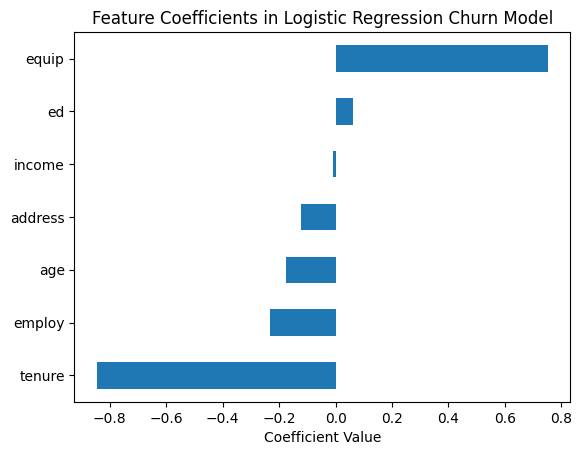

In [39]:
coef = pd.Series(model.coef_[0], index = df.columns[:-1])
coef.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

In Logistic Regression, the coefficient show us the correlation between the class being True and the feature. i.e. a positive coefficient means, the higher the value of this feature, more the chances of the class being True, and similarly for negative, the class will not be True. Then, the magnitude (Absolute Value) shows how much the feature influences the final result.

Now, we have used out model to predict the values. Now, we need to access it. Logistic Regression is accessed using the metric Log Loss. It is also known as Binary Cross entropy loss. The lower it is, the better.

In [41]:
from sklearn.metrics import log_loss

log_loss(y_test, y_prob)

0.6257718410257235

Log Loss of 0.6 is pretty decent.

Hence, we have successfully trained and predicted using our Logistic Regression Model.